In [254]:
!pip install yfinance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
GOOG_data = yf.Ticker("GOOG")

In [256]:
GOOG_data = yf.download("GOOG", start='2023-12-01',end='2024-12-01')



[*********************100%***********************]  1 of 1 completed


In [257]:
GOOG_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2023-12-01,132.993408,133.320007,133.500000,132.151993,133.320007,24258400
2023-12-04,130.309982,130.630005,131.449997,129.399994,131.294006,24117100
2023-12-05,132.065674,132.389999,133.539993,129.729996,130.369995,19235100
2023-12-06,131.108002,131.429993,133.309998,131.309998,132.899994,16360600
2023-12-07,138.110825,138.449997,140.000000,136.229996,136.600006,38419400
...,...,...,...,...,...,...
2024-11-22,166.570007,166.570007,168.264999,165.710007,167.160004,24497000
2024-11-25,169.429993,169.429993,170.460007,167.399994,167.990005,21395700


In [258]:
df = pd.read_excel("Google.xlsx")

In [259]:
df

,Date,Close
0,2023-12-01,133.320007
1,2023-12-04,130.630005
2,2023-12-05,132.389999
3,2023-12-06,131.429993
4,2023-12-07,138.449997
...,...,...
246,2024-11-22,166.570007
247,2024-11-25,169.429993
248,2024-11-26,170.619995
249,2024-11-27,170.820007


In [260]:
df.set_index('Date',inplace = True)

In [261]:
df.head()

,Close
Date,
2023-12-01,133.320007
2023-12-04,130.630005
2023-12-05,132.389999
2023-12-06,131.429993
2023-12-07,138.449997


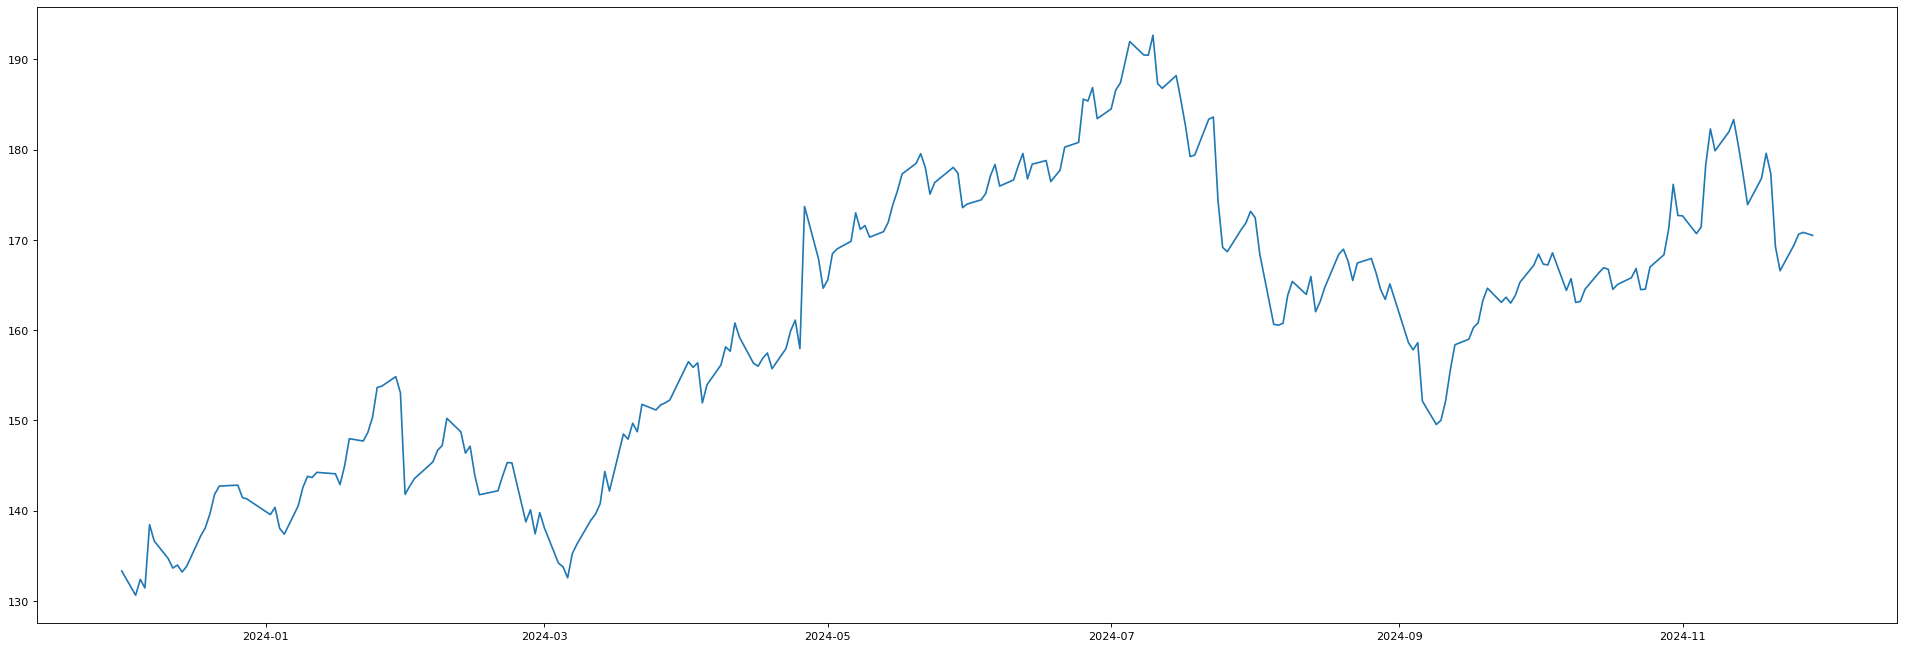

In [262]:
plt.figure(figsize=(30,10),dpi=80)
plt.title = ("Google Stock Prize")
plt.plot(df.Close)

In [263]:
from statsmodels.tsa.stattools import kpss

In [264]:
stats, p,lags,critrical_values = kpss(df["Close"], "ct")

/var/folders/s_/cjvl29y140v83l4_ns5z5c340000gn/T/ipykernel_33627/1376614457.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p,lags,critrical_values = kpss(df["Close"], "ct")


In [265]:
stats

0.3598166097306999

In [266]:
p

0.01

In [267]:
critrical_values

{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}

ADF Test [Augmented Dickey Fuller Test]

if p-valueis >0.05, series is trending if p-valueis <0.05, series is stationary

In [269]:
from statsmodels.tsa.stattools import adfuller

In [270]:
score  = adfuller(df["Close"])

In [271]:
score

(-1.9191842406857302,
 0.32309075078189686,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1136.5881619054185)

#p=0.32309075078189686

Converting a non-stationary series into a stationary one

Differencing of order 1:

y(t) = y(t)-y(t-1)

In [274]:
df["Close_diff"]= df ["Close"]-df["Close"].shift(1)

df["Close_diff"]

Date
2023-12-01         NaN
2023-12-04   -2.690002
2023-12-05    1.759995
2023-12-06   -0.960007
2023-12-07    7.020004
                ...   
2024-11-22   -2.669998
2024-11-25    2.859985
2024-11-26    1.190002
2024-11-27    0.200012
2024-11-29   -0.330002
Name: Close_diff, Length: 251, dtype: float64

<Axes: xlabel='Date'>

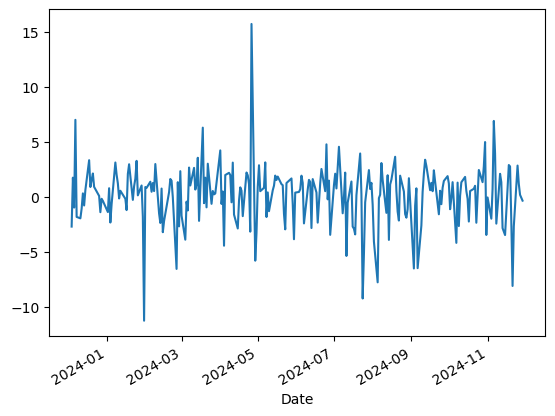

In [275]:
df["Close_diff"].dropna().plot()

In [296]:
score1 = adfuller(df["Close_diff"].dropna())

score1

(-15.56322839773954,
 2.03002149165707e-28,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 1135.4150512604695)

Seasonal Differencing-Differencing of order n 

y(t)=y(t)-y(t-n)


In [298]:
df["Close_diff5"] = df["Close"]-df["Close"].shift(5)

df["Close_diff5"]

Date
2023-12-01         NaN
2023-12-04         NaN
2023-12-05         NaN
2023-12-06         NaN
2023-12-07         NaN
                ...   
2024-11-22   -7.319992
2024-11-25   -7.370010
2024-11-26   -8.960007
2024-11-27   -6.509995
2024-11-29    1.250000
Name: Close_diff5, Length: 251, dtype: float64

<Axes: xlabel='Date'>

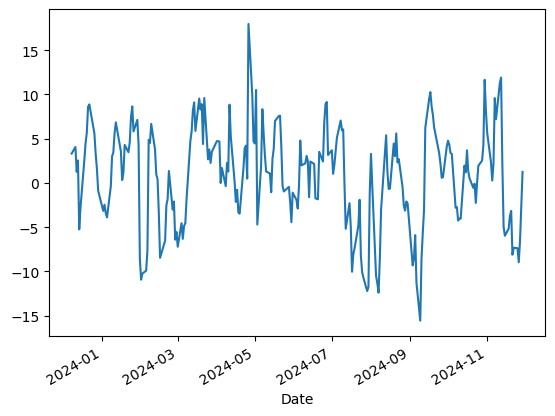

In [300]:
df["Close_diff5"].dropna().plot()

In [302]:
score5 =adfuller(df["Close_diff5"].dropna())

score5

(-3.3448959095304382,
 0.012987081865383941,
 15,
 230,
 {'1%': -3.459105583381277,
  '5%': -2.8741898504150574,
  '10%': -2.5735117958412097},
 1177.9758164611171)

Plotting for acf and pacf to understand which technique to use forecast


In [304]:
!pip install statsmodels

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

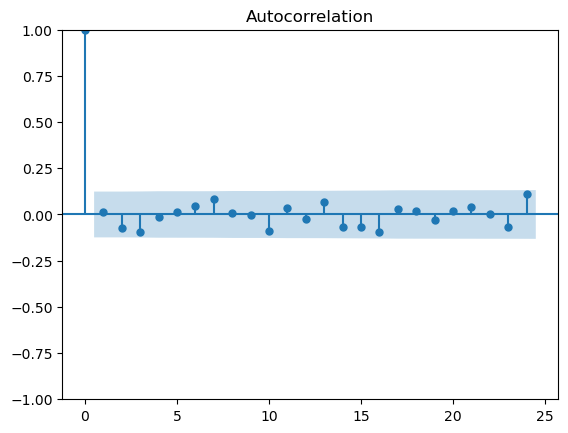

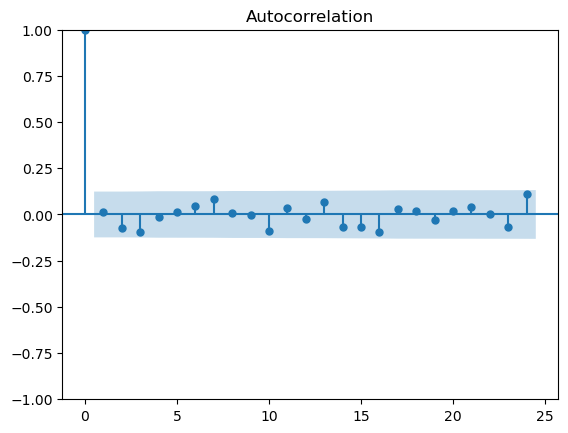

In [306]:
plot_acf(df["Close_diff"].dropna())

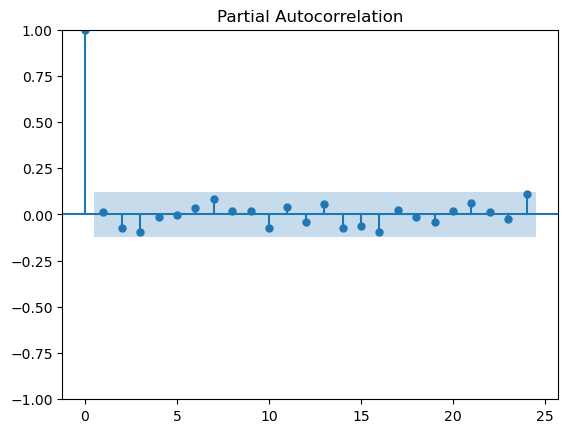

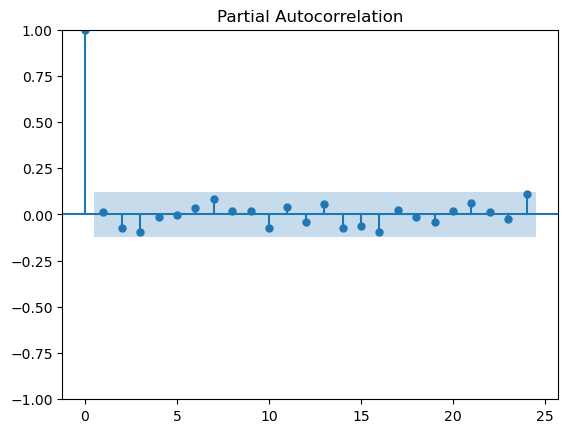

In [308]:
plot_pacf(df["Close_diff"].dropna())

In [ ]:
#Forecasting with AR Using AutoReg

In [310]:
from statsmodels.tsa.ar_model import AutoReg

In [312]:
model_ar = AutoReg(df["Close"],lags=1)

model_ar_fit = model_ar.fit()

print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  251
Model:                     AutoReg(1)   Log Likelihood                -602.622
Method:               Conditional MLE   S.D. of innovations              2.695
Date:                Tue, 03 Dec 2024   AIC                           1211.243
Time:                        03:03:53   BIC                           1221.808
Sample:                             1   HQIC                          1215.495
                                  251                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5847      1.791      2.001      0.045       0.074       7.096
Close.L1       0.9787      0.011     88.391      0.000       0.957       1.000
                                    Roots           

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


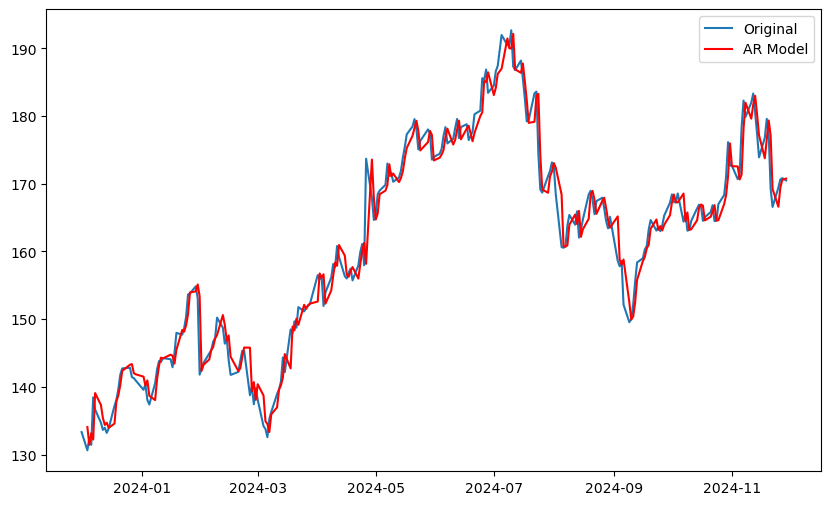

In [314]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_ar_fit.fittedvalues,color="red",label="AR Model")

plt.legend()

plt.show()

In [ ]:
#Forecasting with ARIMA moving average

In [316]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA 

In [318]:
order = (0,5,1) #(p,d,q)

model_ma = ARIMA(df["Close"],order=order)

model_ma_fit = model_ma.fit()

print(model_ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 5, 1)   Log Likelihood                -960.301
Date:                Tue, 03 Dec 2024   AIC                           1924.603
Time:                        03:05:01   BIC                           1931.614
Sample:                             0   HQIC                          1927.426
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9996      2.902     -0.344      0.730      -6.687       4.688
sigma2       140.8753    408.777      0.345      0.730    -660.313     942.064
Ljung-Box (L1) (Q):                 131.97   Jarque-

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<function matplotlib.pyplot.show(close=None, block=None)>

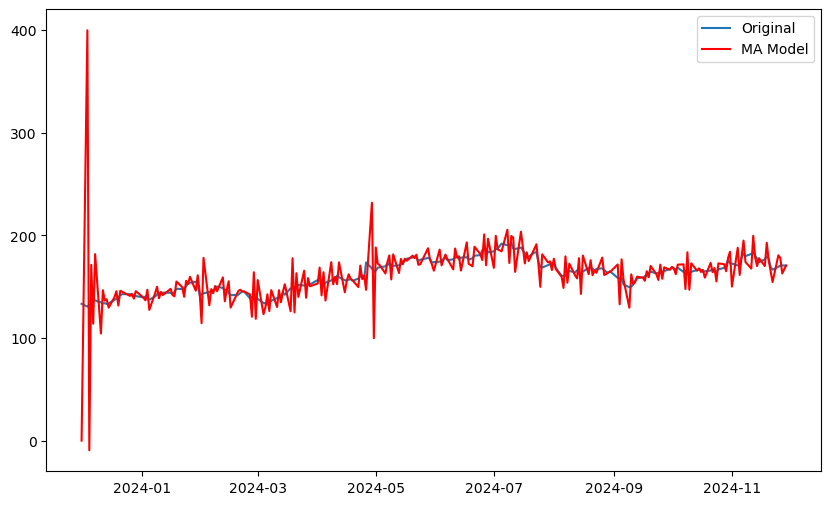

In [320]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_ma_fit.fittedvalues.dropna(),color="red",label="MA Model")

plt.legend()

plt.show

In [ ]:
#Identifying optimal order

In [ ]:
!pip install pmdarima

In [322]:
from pmdarima.arima import auto_arima

In [324]:
autoarima_model = auto_arima(df["Close"],seasonal=False, stepwise=True, suppress_warnings = True)

order = autoarima_model.get_params()["order"]

print("Optimal ARIMA order is ", order)

Optimal ARIMA order is  (0, 1, 0)


In [326]:
model = ARIMA(df["Close"],order=order)

result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -604.839
Date:                Tue, 03 Dec 2024   AIC                           1211.678
Time:                        03:08:14   BIC                           1215.199
Sample:                             0   HQIC                          1213.095
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.3952      0.343     21.581      0.000       6.724       8.067
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               314.34
Prob(Q):                              0.85   Pr

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#ARMA

In [348]:
order = (2,0,3) #(p,d,q)

model_arma = ARIMA (df["Close"], order=order)

model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -606.986
Date:                Tue, 03 Dec 2024   AIC                           1227.972
Time:                        03:20:11   BIC                           1252.650
Sample:                             0   HQIC                          1237.903
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.0231      9.691     16.202      0.000     138.028     176.018
ar.L1          0.8788      0.850      1.033      0.301      -0.788       2.546
ar.L2          0.1100      0.842      0.131      0.8

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#SRMA
(p,d,q)X(P,D,Q,M)

In [330]:
df["Close_diff10"] =df["Close"]-df["Close"].shift(10)

df["Close_diff10"]

Date
2023-12-01          NaN
2023-12-04          NaN
2023-12-05          NaN
2023-12-06          NaN
2023-12-07          NaN
                ...    
2024-11-22   -13.289993
2024-11-25   -12.540009
2024-11-26   -12.700012
2024-11-27    -9.669998
2024-11-29    -6.860001
Name: Close_diff10, Length: 251, dtype: float64

<Axes: xlabel='Date'>

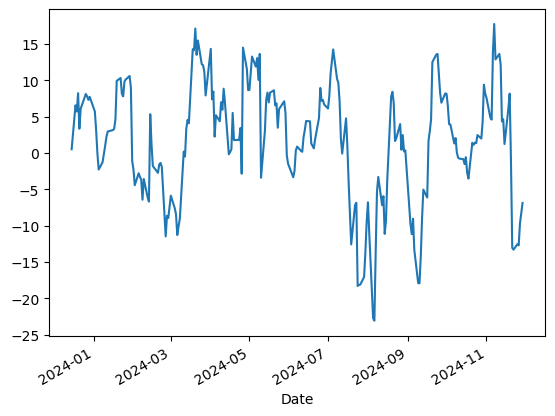

In [332]:
df["Close_diff10"].dropna().plot()

In [334]:
score10 = adfuller(df["Close_diff10"].dropna())

score10

(-3.2993983860660374,
 0.01490538807897432,
 10,
 230,
 {'1%': -3.459105583381277,
  '5%': -2.8741898504150574,
  '10%': -2.5735117958412097},
 1193.7296836597934)

In [336]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

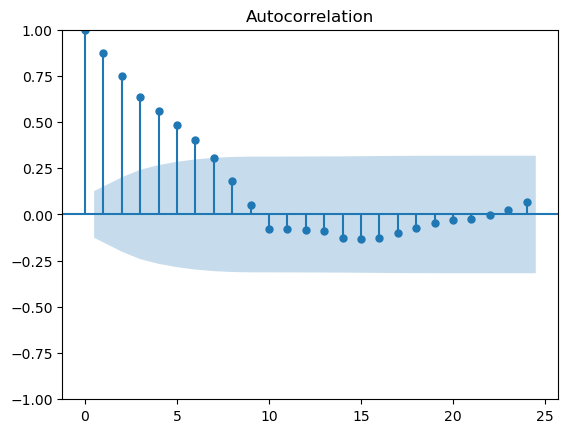

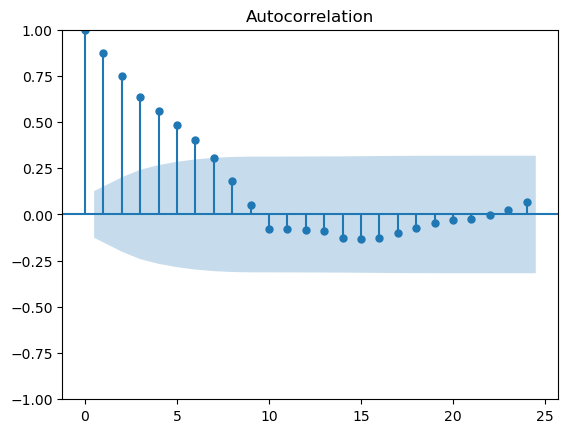

In [338]:
plot_acf(df["Close_diff10"].dropna())

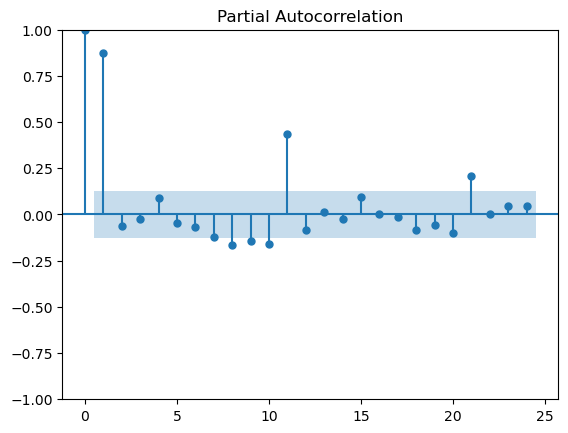

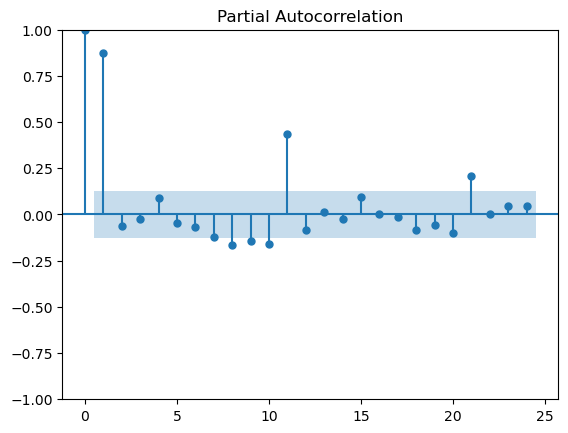

In [340]:
plot_pacf(df["Close_diff10"].dropna())

In [342]:
import statsmodels.api as sm

model_sarima = sm.tsa.statespace.SARIMAX(df["Close"],order=(0,1,0),seasonal_order=(0,1,0,24))

model_sarima_fit= model_sarima.fit()

model_sarima_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43044D+00    |proj g|=  2.92563D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   1.431D-06   2.428D+00
  F =   2.4278727115578671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood                -609.396
Date:                            Tue, 03 Dec 2024   AIC                           1220.792
Time:                                    03:10:47   BIC                           1224.213
Sample:                                         0   HQIC                          1222.172
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.8713      0.853     15.093      0.000      11.200      14.543
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                40.15
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.19
Prob(H) (two-sided):                  0.38   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

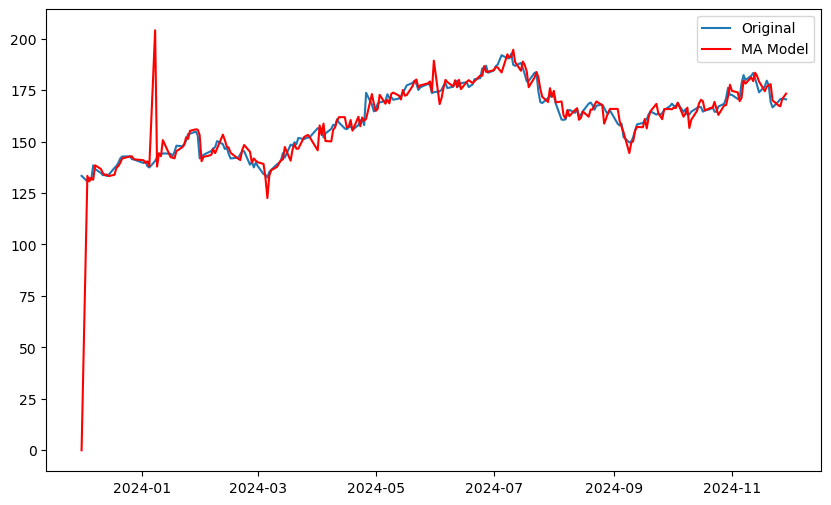

In [344]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_sarima_fit.fittedvalues.dropna(),color="red",label="MA Model")

plt.legend()

plt.show()

In [350]:
# Answer :By referring to above result data we can say ARIMA Auto regression Technique would best for Google

In [352]:
TSLA_data = yf.download("TSLA", start='2023-12-01',end='2024-12-01')


[*********************100%***********************]  1 of 1 completed


In [354]:
TSLA_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300
...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900


In [358]:
TSLA_data.to_excel("Tesla_data.xlsx")

In [362]:
df = pd.read_excel("Tesla.xlsx")

In [364]:
df

,Date,Close
0,2023-12-01,238.830002
1,2023-12-04,235.580002
2,2023-12-05,238.720001
3,2023-12-06,239.369995
4,2023-12-07,242.639999
...,...,...
246,2024-11-22,352.559998
247,2024-11-25,338.589996
248,2024-11-26,338.230011
249,2024-11-27,332.890015


In [366]:
df.set_index('Date',inplace = True)

In [368]:
df.head()

,Close
Date,
2023-12-01,238.830002
2023-12-04,235.580002
2023-12-05,238.720001
2023-12-06,239.369995
2023-12-07,242.639999


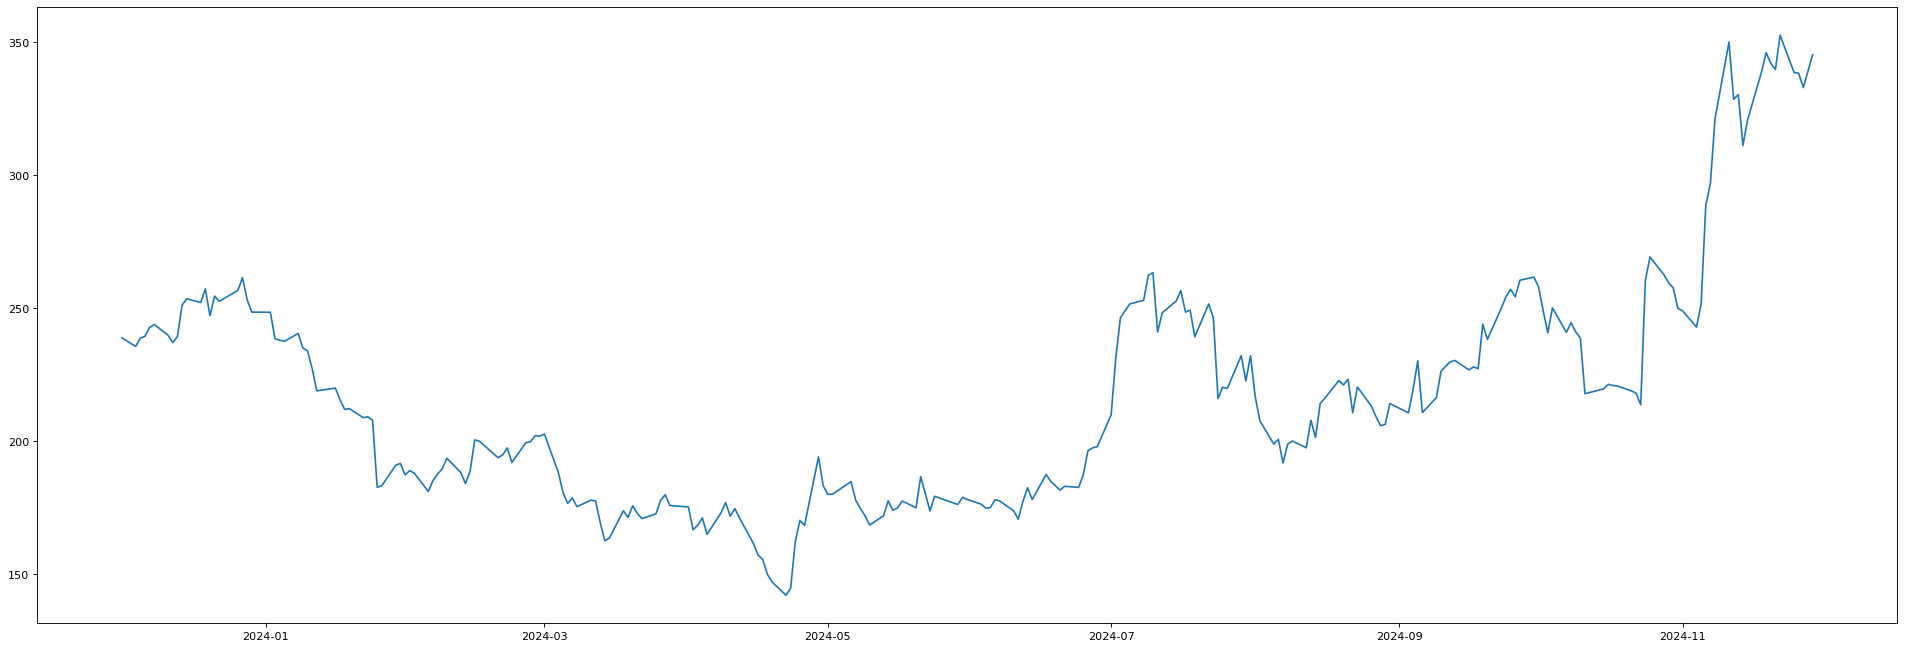

In [374]:
plt.figure(figsize=(30,10),dpi=80)
plt.title = ("Tesla Stock Prize")
plt.plot(df.Close)

Methods to Check Stationarity in Data

KPSS Test if p-value < 0.05, series is trending if p-value > 0.05, series is stationary

In [372]:
from statsmodels.tsa.stattools import kpss

In [376]:
stats, p,lags,critrical_values = kpss(df["Close"], "ct")

/var/folders/s_/cjvl29y140v83l4_ns5z5c340000gn/T/ipykernel_33627/1376614457.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p,lags,critrical_values = kpss(df["Close"], "ct")


In [378]:
stats

0.4052581166962992

In [380]:
p

0.01

In [382]:
critrical_values

{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}

In [384]:
from statsmodels.tsa.stattools import adfuller

In [386]:
score  = adfuller(df["Close"])

In [388]:
score

(-0.2154665389845155,
 0.9366527608531471,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1687.5730444043124)

In [390]:
# p= 0.9366527608531471

Converting a non-stationary series into a stationary one



Differencing of order 1:

y(t) = y(t)-y(t-1)

In [394]:
df["Close_diff"]= df ["Close"]-df["Close"].shift(1)

df["Close_diff"]

Date
2023-12-01          NaN
2023-12-04    -3.250000
2023-12-05     3.139999
2023-12-06     0.649994
2023-12-07     3.270004
                ...    
2024-11-22    12.919983
2024-11-25   -13.970001
2024-11-26    -0.359985
2024-11-27    -5.339996
2024-11-29    12.269989
Name: Close_diff, Length: 251, dtype: float64

<Axes: xlabel='Date'>

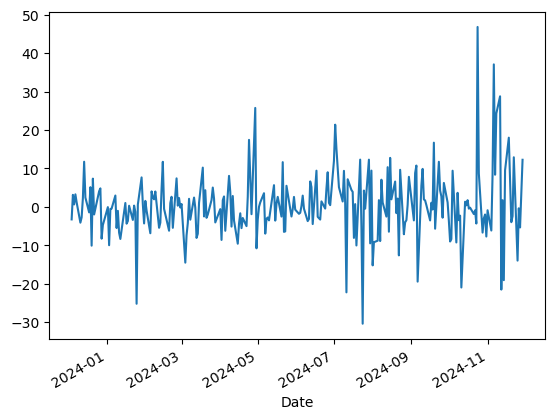

In [396]:
df["Close_diff"].dropna().plot()

In [398]:
score1 = adfuller(df["Close_diff"].dropna())

score1

(-15.615983299237964,
 1.7558357345756685e-28,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 1681.1655605148367)

Seasonal Differencing-Differencing of order n 

y(t)=y(t)-y(t-n)



In [402]:
df["Close_diff5"] = df["Close"]-df["Close"].shift(5)

df["Close_diff5"]

Date
2023-12-01          NaN
2023-12-04          NaN
2023-12-05          NaN
2023-12-06          NaN
2023-12-07          NaN
                ...    
2024-11-22    31.839996
2024-11-25    -0.149994
2024-11-26    -7.769989
2024-11-27    -9.139984
2024-11-29     5.519989
Name: Close_diff5, Length: 251, dtype: float64

<Axes: xlabel='Date'>

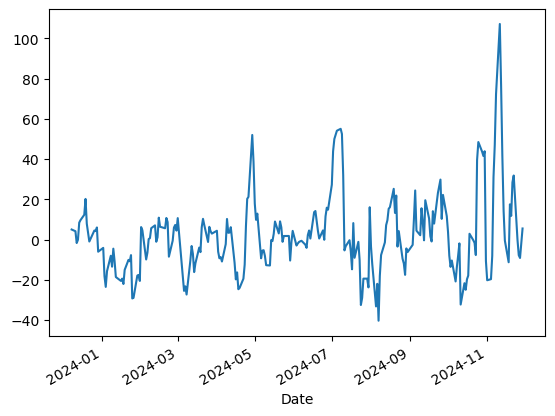

In [404]:
df["Close_diff5"].dropna().plot()

In [406]:
score5 =adfuller(df["Close_diff5"].dropna())

score5

(-3.3380561224640393,
 0.013260733633716793,
 16,
 229,
 {'1%': -3.4592326027153493,
  '5%': -2.8742454699025872,
  '10%': -2.5735414688888465},
 1730.4965726920989)

#Plotting for acf and pacf to understand which technique to use forecast


In [ ]:
!pip install statsmodels

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

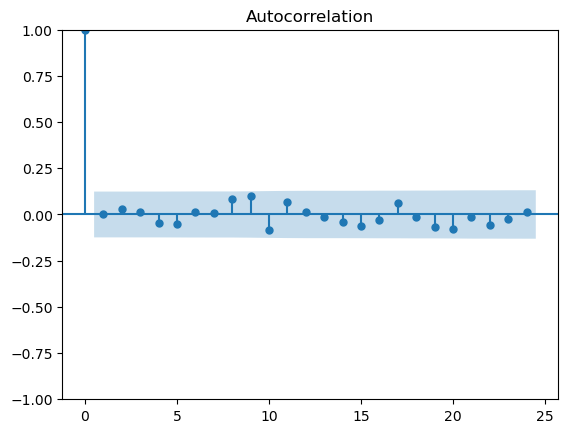

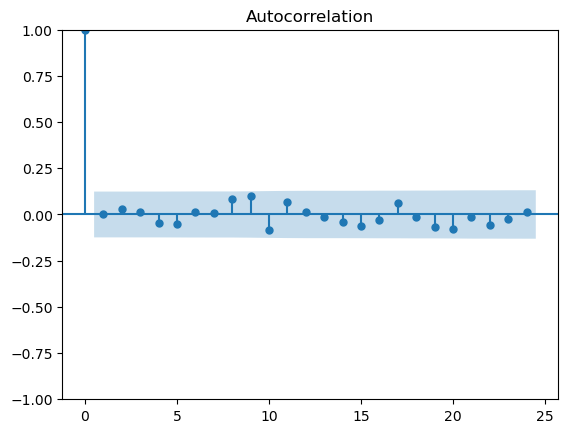

In [410]:
plot_acf(df["Close_diff"].dropna())

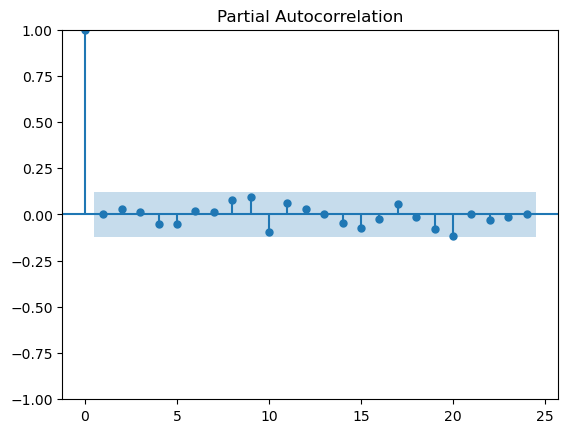

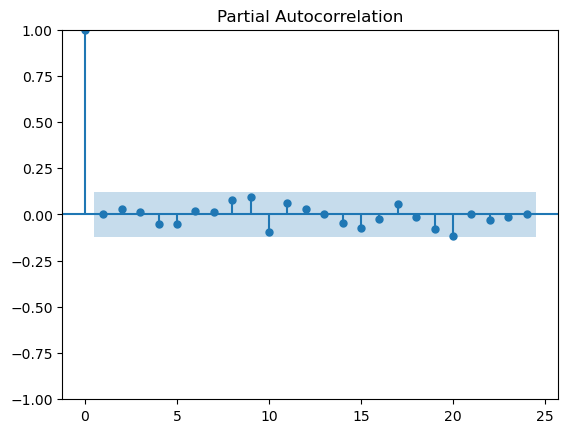

In [412]:
plot_pacf(df["Close_diff"].dropna())

In [414]:
#Forecasting with AR Using AutoReg

In [416]:
from statsmodels.tsa.ar_model import AutoReg

In [418]:
model_ar = AutoReg(df["Close"],lags=1)

model_ar_fit = model_ar.fit()

print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  251
Model:                     AutoReg(1)   Log Likelihood                -893.792
Method:               Conditional MLE   S.D. of innovations              8.639
Date:                Tue, 03 Dec 2024   AIC                           1793.585
Time:                        03:38:25   BIC                           1804.149
Sample:                             1   HQIC                          1797.837
                                  251                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0227      2.815      0.363      0.716      -4.495       6.540
Close.L1       0.9972      0.013     77.968      0.000       0.972       1.022
                                    Roots           

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


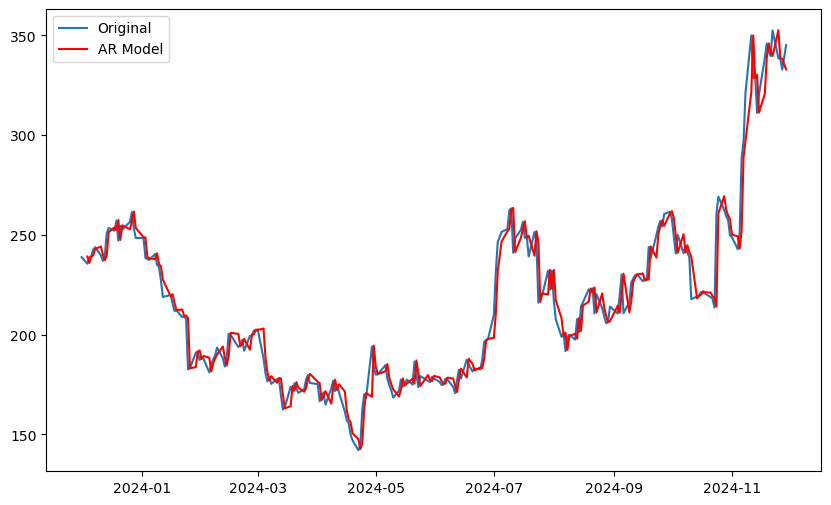

In [420]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_ar_fit.fittedvalues,color="red",label="AR Model")

plt.legend()

plt.show()

In [422]:
#Forecasting with ARIMA moving average

In [424]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA 

In [426]:
order = (0,5,1) #(p,d,q)

model_ma = ARIMA(df["Close"],order=order)

model_ma_fit = model_ma.fit()

print(model_ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 5, 1)   Log Likelihood               -1252.441
Date:                Tue, 03 Dec 2024   AIC                           2508.882
Time:                        03:39:11   BIC                           2515.893
Sample:                             0   HQIC                          2511.705
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9988      0.798     -1.252      0.211      -2.562       0.565
sigma2      1516.2137   1226.679      1.236      0.216    -888.032    3920.460
Ljung-Box (L1) (Q):                 140.02   Jarque-

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<function matplotlib.pyplot.show(close=None, block=None)>

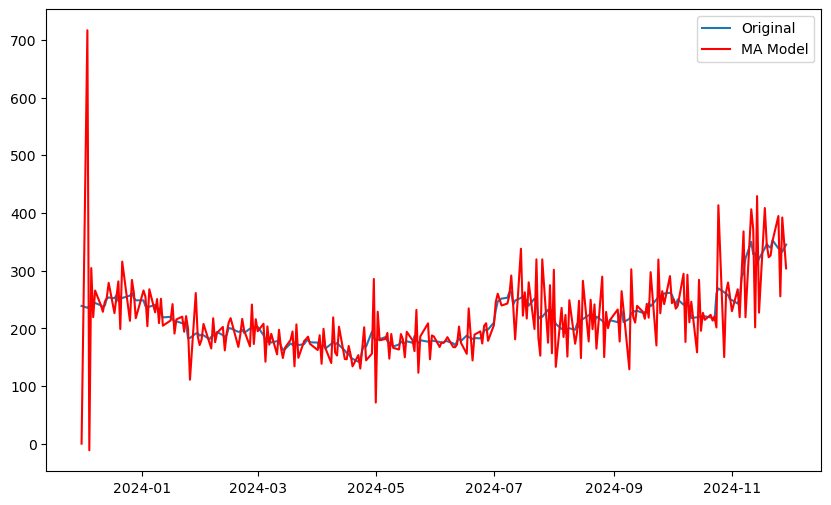

In [428]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_ma_fit.fittedvalues.dropna(),color="red",label="MA Model")

plt.legend()

plt.show

In [430]:
#Identifying optimal order

In [432]:
from pmdarima.arima import auto_arima

In [434]:
autoarima_model = auto_arima(df["Close"],seasonal=False, stepwise=True, suppress_warnings = True)

order = autoarima_model.get_params()["order"]

print("Optimal ARIMA order is ", order)

Optimal ARIMA order is  (0, 1, 0)


In [436]:
model = ARIMA(df["Close"],order=order)

result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -894.118
Date:                Tue, 03 Dec 2024   AIC                           1790.237
Time:                        03:40:05   BIC                           1793.758
Sample:                             0   HQIC                          1791.654
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        74.8188      3.503     21.358      0.000      67.953      81.685
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               305.60
Prob(Q):                              0.96   Pr

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [438]:
#ARMA

In [440]:
order = (2,0,3) #(p,d,q)

model_arma = ARIMA (df["Close"], order=order)

model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -898.865
Date:                Tue, 03 Dec 2024   AIC                           1811.729
Time:                        03:40:26   BIC                           1836.408
Sample:                             0   HQIC                          1821.661
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        223.2482     42.257      5.283      0.000     140.425     306.071
ar.L1          0.7064      1.568      0.451      0.652      -2.367       3.779
ar.L2          0.2740      1.547      0.177      0.8

#SRMA
(p,d,q)X(P,D,Q,M)

In [444]:
df["Close_diff10"] =df["Close"]-df["Close"].shift(10)

df["Close_diff10"]

Date
2023-12-01          NaN
2023-12-04          NaN
2023-12-05          NaN
2023-12-06          NaN
2023-12-07          NaN
                ...    
2024-11-22    31.339996
2024-11-25   -11.410004
2024-11-26     9.740021
2024-11-27     2.650024
2024-11-29    33.980011
Name: Close_diff10, Length: 251, dtype: float64

<Axes: xlabel='Date'>

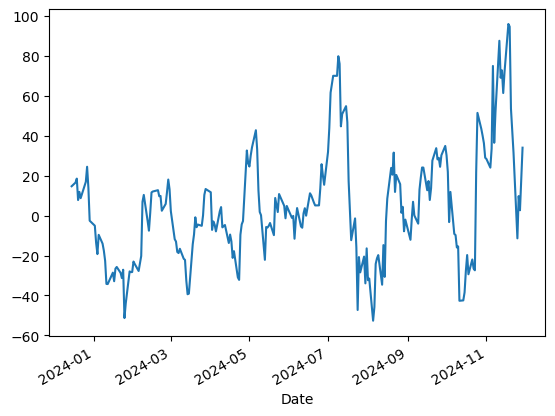

In [446]:
df["Close_diff10"].dropna().plot()

In [448]:
score10 = adfuller(df["Close_diff10"].dropna())

score10

(-2.6936417043521845,
 0.07514500935106158,
 10,
 230,
 {'1%': -3.459105583381277,
  '5%': -2.8741898504150574,
  '10%': -2.5735117958412097},
 1738.2526445378953)

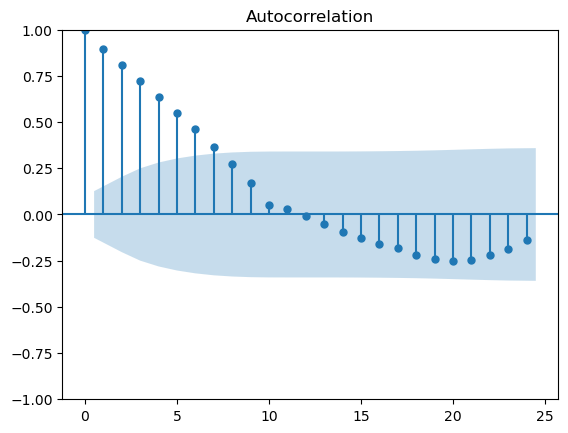

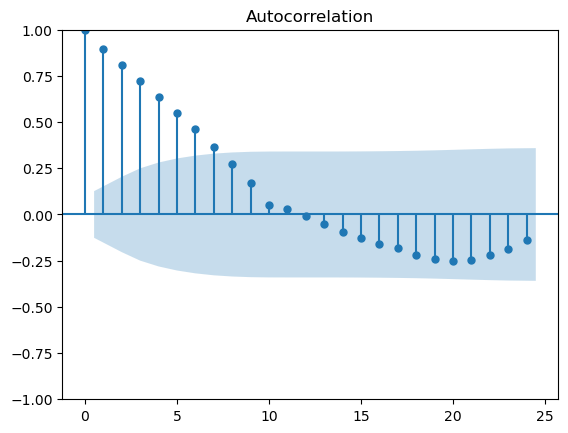

In [450]:
plot_acf(df["Close_diff10"].dropna())

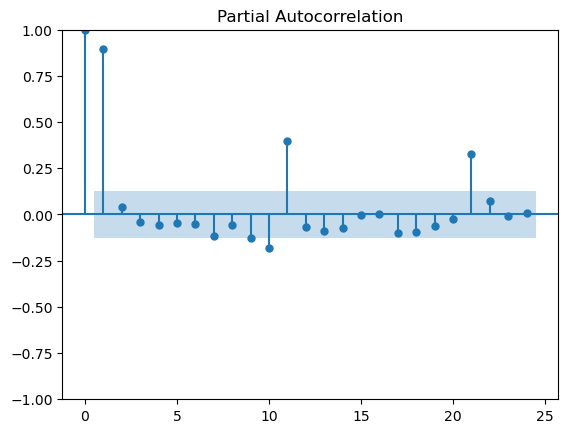

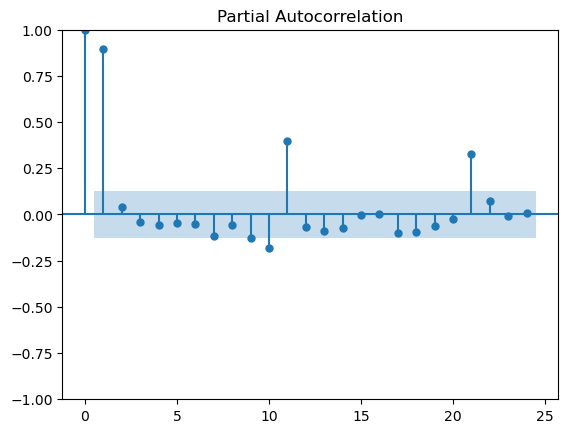

In [452]:
plot_pacf(df["Close_diff10"].dropna())

In [454]:
import statsmodels.api as sm

model_sarima = sm.tsa.statespace.SARIMAX(df["Close"],order=(0,1,0),seasonal_order=(0,1,0,24))

model_sarima_fit= model_sarima.fit()

model_sarima_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50110D+00    |proj g|=  8.90869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.109D-07   3.499D+00
  F =   3.4985306356859738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood                -878.131
Date:                            Tue, 03 Dec 2024   AIC                           1758.262
Time:                                    03:42:03   BIC                           1761.683
Sample:                                         0   HQIC                          1759.643
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       138.8234      7.742     17.931      0.000     123.649     153.998
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               128.54
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.49   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

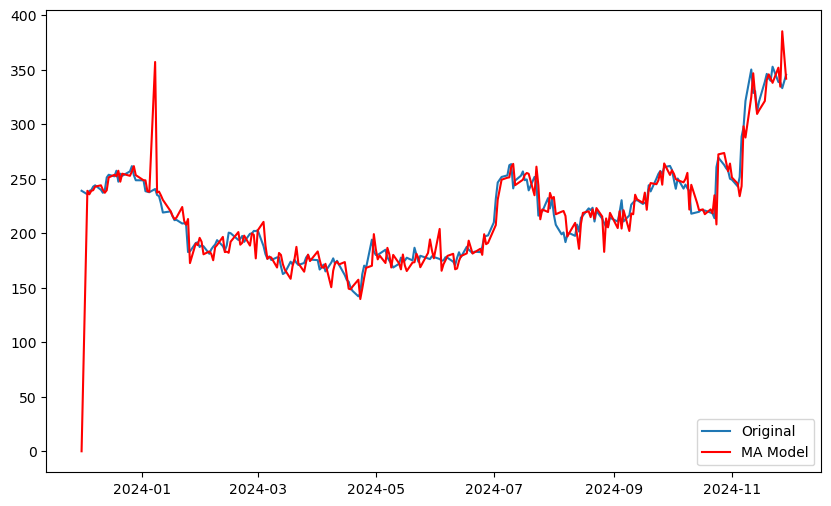

In [456]:
plt.figure(figsize=(10,6))

plt.plot(df["Close"],label="Original")

plt.plot(model_sarima_fit.fittedvalues.dropna(),color="red",label="MA Model")

plt.legend()

plt.show()

In [458]:
# Answer :By referring to above result data we can say SARIMA Technique would best for Tesla